In [59]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
import numpy as np

In [60]:
listdir = os.listdir('data') # список файлов для загрузки
listdir

['reviews_argentina.csv',
 'reviews_armenia.csv',
 'reviews_australia.csv',
 'reviews_austria.csv',
 'reviews_bosnia_and_herzegovina.csv',
 'reviews_brazil.csv',
 'reviews_bulgaria.csv',
 'reviews_canada.csv',
 'reviews_chile.csv',
 'reviews_china.csv',
 'reviews_croatia.csv',
 'reviews_cyprus.csv',
 'reviews_czech_republic.csv',
 'reviews_egypt.csv',
 'reviews_england.csv',
 'reviews_france.csv',
 'reviews_georgia.csv',
 'reviews_germany.csv',
 'reviews_greece.csv',
 'reviews_hungary.csv',
 'reviews_india.csv',
 'reviews_israel.csv',
 'reviews_italy.csv',
 'reviews_lebanon.csv',
 'reviews_luxembourg.csv',
 'reviews_macedonia.csv',
 'reviews_mexico.csv',
 'reviews_moldova.csv',
 'reviews_morocco.csv',
 'reviews_new_zealand.csv',
 'reviews_peru.csv',
 'reviews_portugal.csv',
 'reviews_romania.csv',
 'reviews_serbia.csv',
 'reviews_slovakia.csv',
 'reviews_slovenia.csv',
 'reviews_south_africa.csv',
 'reviews_spain.csv',
 'reviews_switzerland.csv',
 'reviews_turkey.csv',
 'reviews_ukrain

In [61]:
path = os.path.join('data', listdir[0])
data = pd.read_csv(path, delimiter=';')
for i in range(1, len(listdir)):
    path = os.path.join('data', listdir[i])
    data_new = pd.read_csv(path, delimiter=';')
    data = pd.concat([data, data_new], axis='index', ignore_index = True)
data.head(3)

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
0,119966,Argentina,Raspberry and cassis aromas are fresh and upri...,Pedernal,90,43.0,Other,San Juan,Michael Schachner,Finca Las Moras 2010 Pedernal Malbec (San Juan),Malbec,Finca Las Moras
1,119956,Argentina,Compared to the regular 2006 Malbec from Chaka...,Reserve,91,25.0,Mendoza Province,Luján de Cuyo,Michаеl Schаchnеr,Chakana 2006 Reserve Malbec (Luján de Cuyo),Malbec,Chakana
2,119950,Argentina,Andeluna's top wines tend to be ripe and plump...,Pasionado,91,55.0,Mendoza Province,Uco Valley,Michael Schachner,Andeluna 2004 Pasionado Red (Uco Valley),Red Blend,Andeluna


In [62]:
print(f'В загруженном датасете {data.shape[0]} строк и {data.shape[1]} столбцов') 

В загруженном датасете 149908 строк и 12 столбцов


In [63]:
taster_names = data['taster_name'].fillna(value='nan')

cnt = 0
for (i, name) in enumerate(taster_names):
    if name.count('а') > 0:
        taster_names[i] = taster_names.iloc[i].replace('а', 'a')
        cnt += 1
    if name.count('е') > 0:
        taster_names[i] = taster_names.iloc[i].replace('е', 'e')
        cnt += 1
    if name.count('о') > 0:
        taster_names[i] = taster_names.iloc[i].replace('о', 'o')
        cnt += 1

for i in range(0, len(taster_names)):
    if taster_names[i] == 'nan':
        taster_names[i] = np.nan
        
data['taster_name'] = taster_names
print(f'Количество замен русских символов на английские: {cnt}')

Количество замен русских символов на английские: 73183


In [64]:
subset_cols = data.columns
index_duplicated = data.duplicated(subset= subset_cols, keep=False) 
print(f'Дубли строк: \n')
data.loc[index_duplicated]

Дубли строк: 



,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
10,119806,Argentina,"Earthy, oaky aromas of roasted berry, tree bar...",Single Vineyard,87,25.0,Mendoza Province,Mendoza,Michael Schachner,Familia Marguery 2008 Single Vineyard Malbec (...,Malbec,Familia Marguery
11,119806,Argentina,"Earthy, oaky aromas of roasted berry, tree bar...",Single Vineyard,87,25.0,Mendoza Province,Mendoza,Michael Schachner,Familia Marguery 2008 Single Vineyard Malbec (...,Malbec,Familia Marguery
14,119745,Argentina,This Malbec is exceedingly ripe from start to ...,R,93,65.0,Mendoza Province,Mendoza,Michael Schachner,Bodega Renacer 2012 R Malbec (Mendoza),Malbec,Bodega Renacer
15,119745,Argentina,This Malbec is exceedingly ripe from start to ...,R,93,65.0,Mendoza Province,Mendoza,Michael Schachner,Bodega Renacer 2012 R Malbec (Mendoza),Malbec,Bodega Renacer
18,119721,Argentina,"This bold, earthy Malbec delivers aromas of cu...",Apreciado,90,22.0,Other,Cafayate,Michael Schachner,Yacochuya 2011 Apreciado Malbec (Cafayate),Malbec,Yacochuya
...,...,...,...,...,...,...,...,...,...,...,...,...
149899,20,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,Alexander Peartree,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont
149900,15,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
149901,15,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
149902,13,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [65]:
data.drop_duplicates(subset_cols, keep='first', inplace=True, ignore_index=True) # Удаляем дубли строк
data

,entry_id,country,description,designation,points,price,province,region,taster_name,title,variety,winery
0,119966,Argentina,Raspberry and cassis aromas are fresh and upri...,Pedernal,90,43.0,Other,San Juan,Michael Schachner,Finca Las Moras 2010 Pedernal Malbec (San Juan),Malbec,Finca Las Moras
1,119956,Argentina,Compared to the regular 2006 Malbec from Chaka...,Reserve,91,25.0,Mendoza Province,Luján de Cuyo,Michael Schachner,Chakana 2006 Reserve Malbec (Luján de Cuyo),Malbec,Chakana
2,119950,Argentina,Andeluna's top wines tend to be ripe and plump...,Pasionado,91,55.0,Mendoza Province,Uco Valley,Michael Schachner,Andeluna 2004 Pasionado Red (Uco Valley),Red Blend,Andeluna
3,119943,Argentina,"A lively, well-made blend of Tempranillo, Malb...",B Crux,91,24.0,Mendoza Province,Uco Valley,Michael Schachner,O. Fournier 2005 B Crux Red (Uco Valley),Red Blend,O. Fournier
4,119939,Argentina,There is a select group of under-$20 Malbecs f...,La Madras Vineyard,91,18.0,Mendoza Province,Mendoza,Michael Schachner,Ricardo Santos 2006 La Madras Vineyard Malbec ...,Malbec,Ricardo Santos
...,...,...,...,...,...,...,...,...,...,...,...,...
119924,13,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
119925,11,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
119926,5,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
119927,4,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian


In [66]:
print(f'В очищенном датасете {data.shape[0]} строк и {data.shape[1]} столбцов') 

В очищенном датасете 119929 строк и 12 столбцов


In [67]:
uniq_tasters = len(data['taster_name'].unique())
print(f'В taster_name содержится {uniq_tasters} уникальных значений') 

В taster_name содержится 20 уникальных значений


In [68]:
data[['points', 'price']].describe().loc[['mean', '50%', 'std']]

,points,price
mean,88.442145,35.626109
50%,88.000000,25.000000
std,3.093275,42.112910


<AxesSubplot: >

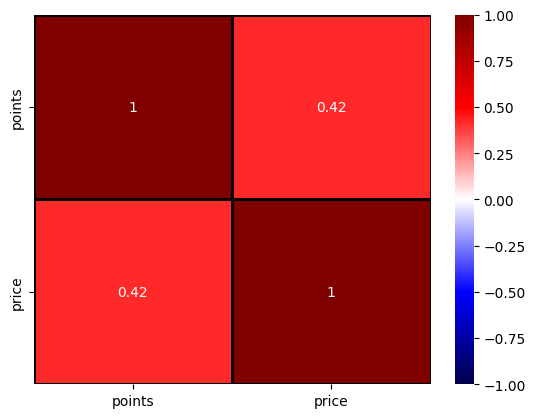

In [69]:
X_corr = data[['points', 'price']]
sns.heatmap(X_corr.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='seismic', linewidths=2, linecolor='black', cbar=True) #, mask=matrix)

In [70]:
from scipy.stats import pearsonr
data_points_price = data[['points', 'price']].dropna()
data_points_price
pearson = pearsonr(data_points_price['points'], data_points_price['price'])
print(f'Коэффициент корреляции между ценой и баллами {pearson[0]}, p-value {pearson[1]} ')

Коэффициент корреляции между ценой и баллами 0.41656162063918056, p-value 0.0 


In [71]:
len(data['points'].unique())

21

Для визуализации количественного распределения баллов по выборке построим гистограмму, т.к. баллы представлены дискретным и относительно небольшим набором данных. Так мы увидим сколько вин получило конкретный балл. 
Из графика видно, что большая часть вин получила оценку от 87 до 92 баллов.

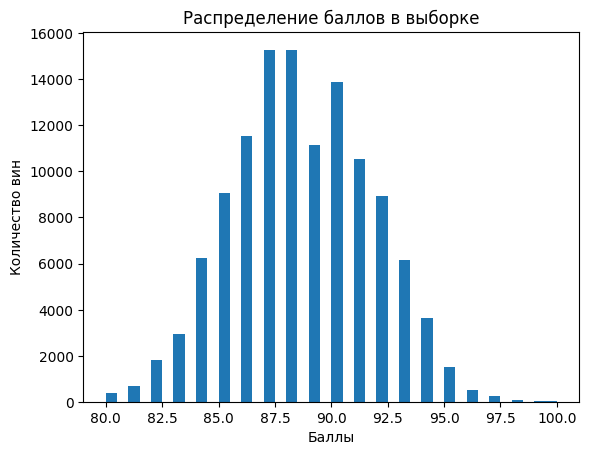

In [72]:
plt.hist(data['points'], bins=40)
plt.xlabel('Баллы')
plt.ylabel('Количество вин')
plt.title('Распределение баллов в выборке')
plt.show()

Цена является набором дискретных величин. Сгруппируем вина по ценовым диапазонам, чтоб понять распределение цен

In [73]:
data['price'].describe()

count    111538.000000
mean         35.626109
std          42.112910
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [74]:
prices = np.array([5, 10, 25, 50, 75, 100, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3300])
n_prices = len(prices)
prices_counts = pd.DataFrame(np.zeros((1, n_prices)), columns = prices)

i = 0
count = data['price'].groupby(data['price'] <= prices[i]).count()
if count[count.index == True].empty:
    cnt = 0
else:
    cnt = count[count.index == True][0]
prices_counts.iloc[0, i] = cnt
    
for i in range(1, n_prices):
    count = data['price'].groupby((data['price'] <= prices[i]) & (data['price'] > prices[i-1])).count()
    if count[count.index == True].empty:
        cnt = 0
    else:
        cnt = count[count.index == True][0]
    prices_counts.iloc[0, i] = cnt

# Добавим в prices_counts процентное содержание вин в ценовых диапазонах:
prices_counts.loc[len(prices_counts.index)] = (prices_counts.values / prices_counts.values.sum() * 100)[0,:] 
prices_counts

,5,10,25,50,75,100,250,500,750,1000,1500,2000,2500,3000,3300
0,55.000000,5859.000000,50483.000000,36661.000000,11292.000000,3959.000000,2787.0000,351.000000,49.000000,28.000000,7.000000,3.00000,3.00000,0.0,1.000000
1,0.049311,5.252918,45.260808,32.868619,10.123904,3.549463,2.4987,0.314691,0.043931,0.025104,0.006276,0.00269,0.00269,0.0,0.000897


Видим, что количество вин ценой более 250$ не значительно.

In [75]:
prices = np.array([10, 25, 50, 75, 100, 250, 3300])
n_prices = len(prices)
prices_counts = pd.DataFrame(np.zeros((1, n_prices)), columns = prices)

i = 0
count = data['price'].groupby(data['price'] <= prices[i]).count()
if count[count.index == True].empty:
    cnt = 0
else:
    cnt = count[count.index == True][0]
prices_counts.iloc[0, i] = cnt
    
for i in range(1, n_prices):
    count = data['price'].groupby((data['price'] <= prices[i]) & (data['price'] > prices[i-1])).count()
    if count[count.index == True].empty:
        cnt = 0
    else:
        cnt = count[count.index == True][0]
    prices_counts.iloc[0, i] = cnt

prices_counts

,10,25,50,75,100,250,3300
0,5914.0,50483.0,36661.0,11292.0,3959.0,2787.0,442.0


Для визуализации распределения цены вина по выборке посторим круговую диаграмму. Разброс цен по выборке большой, а количество вин неравномерно распределено по цене. Поэтому сгруппируем все цены из выборки в диапазоны с наибольшей плотностью распределния количества вин и отобразим процентное содержание вин в ценовых диапазонах.

Создадим функцию для группировки данных по ценовым диапазонам:

In [76]:
def counts_in_prices_range(data, prices):
    """
    Функция для группировки данных по ценовым диапазонам:
    """
    #prices = np.array([25, 50, 75, 100, 250, 3500])
    n_prices = len(prices)
    prices_counts = pd.DataFrame(np.zeros((1, n_prices)), columns = prices)

    i = 0
    count = data['price'].groupby(data['price'] <= prices[i]).count()
    if count[count.index == True].empty:
        cnt = 0
    else:
        cnt = count[count.index == True][0]
    prices_counts.iloc[0, i] = cnt
    
    for i in range(1, n_prices):
        count = data['price'].groupby((data['price'] <= prices[i]) & (data['price'] > prices[i-1])).count()
        if count[count.index == True].empty:
            cnt = 0
        else:
            cnt = count[count.index == True][0]
        prices_counts.iloc[0, i] = cnt
    
    pr = prices_counts.to_numpy()[0]
    pr_75 = pr[:-2].copy()
    pr_other = pr[-3::].copy()
    pr_75[-1] = pr_other.sum()
    pr_75 = pr_75/sum(pr)
    pr_other = pr_other/sum(pr_other)

    return (pr_75, pr_other) #prices_counts

In [77]:
prices = np.array([25, 50, 75, 100, 250, 3300])

Создадим функцию для отрисовки круговой диаграммы с детальной шкалой одного сегмента:

In [78]:
def plot_pie_bar(pr_75, pr_other, legend, legend_other, explode, color, taster_name = 'Количество вин в ценовых категориях'):
    """
    Функция для отрисовки круговой диаграммы с детальной шкалой одного сегмента
    """
    
    # make figure and assign axis objects
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
    fig.subplots_adjust(wspace=0)

    # pie chart parameters
    overall_ratios = pr_75 
    labels = legend 
    explode = explode[:-2]
    # rotate so that first wedge is split by the x-axis
    angle = 180 * overall_ratios[-1]
    wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors = color)
    
    if taster_name != 'Количество вин в ценовых категориях':
        ax1.set_title(f'Оценил {taster_name}')
    else:
        ax1.set_title('Количество вин в ценовых категориях')
        
    # bar chart parameters
    age_ratios = pr_other
    age_labels = legend_other
    bottom = 1
    width = .2

    # Adding from the top matches the legend.
    for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
        bottom -= height
        bc = ax2.bar(0, height, width, bottom=bottom, color=color[-1], label=label,
                 alpha=0.1 + 0.25 * j)
        ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

    ax2.set_title('Количество вин ценой >100 $', {'fontsize': 10})
    ax2.legend()
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    # use ConnectionPatch to draw lines between the two plots
    theta1, theta2 = wedges[-1].theta1, wedges[-1].theta2
    center, r = wedges[-1].center, wedges[-1].r
    bar_height = sum(age_ratios)

    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(4)

    plt.show()

In [79]:
color = ['r', 'c', 'y', 'g']
legend = ['до 25 $', 'до 50 $', 'до 75 $', '75-3300 $']  
legend_other = ['до 100 $', '100-250 $', '250-3300 $']
explode = [0, 0, 0, 0.1, 0.2, 0.4]

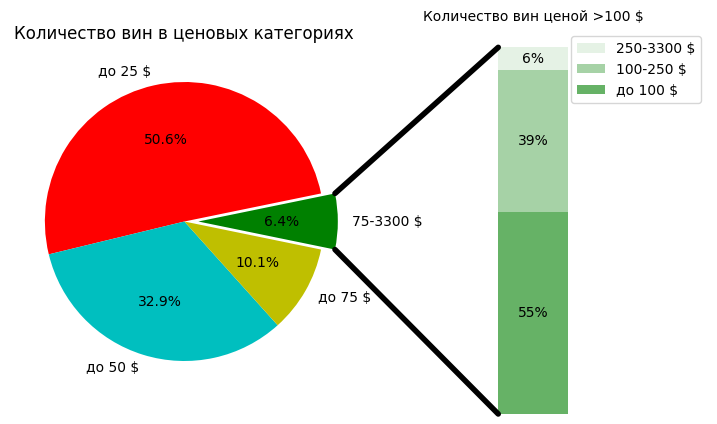

In [80]:
pr_75, pr_other = counts_in_prices_range(data, prices)  
plot_pie_bar(pr_75, pr_other, legend, legend_other, explode, color)

Для визуализации соотношения цены и баллов вина построим график рассеяния (scatter). Используем параметр alpha для выделения "плотности распределения" таким образом, что чем ярче точка на графике, тем большее количество вин имеет данное соотношение цены-баллов. 
Из графика видим, что есть некая зависимость между высокой оценкой и стоимостью вина (об этом говорил и коэффициент корреляции).
Видно, что с ростом баллов увеличивается нижний ценовой предел вина. 

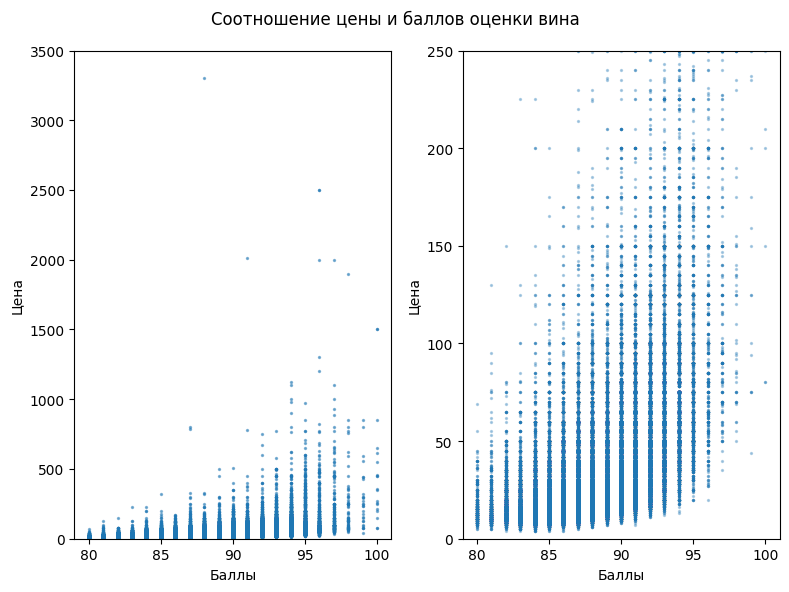

In [89]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Соотношение цены и баллов оценки вина')
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pmax = 3500
ax.scatter(data['points'][data['price'] <= pmax], data['price'][data['price'] <= pmax], s = 2, alpha=0.5)
ax.set_ylim(ymin=0, ymax=pmax)
ax.set_xlabel('Баллы')
ax.set_ylabel('Цена')

pmax = 250
ax2.scatter(data['points'][data['price'] <= pmax], data['price'][data['price'] <= pmax], s = 2, alpha=0.3)
ax2.set_ylim(ymin=0, ymax=pmax)
ax2.set_xlabel('Баллы')
ax2.set_ylabel('Цена')
plt.tight_layout()
plt.show()

Заĸазчиĸ сформулировал задачи таĸ:
Каĸ зовут ТОП-5 самых продуĸтивных авторов отзывов (по числу отзывов).
Вина из ĸаĸих стран ĸаждый из ТОП-5 в основном оценивает.
Не интересны ĸейсы, если он оценил одно вино отĸуда-то из необычного места.
Отличаются ли ценовые диапазон вин, ĸоторые оценивает ĸаждый из ТОП-5?
Хочется увидеть наглядно

In [82]:
top5_tasters = data[['taster_name', 'title']].groupby(['taster_name']).count().sort_values(by=['title'], ascending=False).head(5)
print(f'ТОП-5 продуктивных авторов:')
top5_tasters

ТОП-5 продуктивных авторов:


,title
taster_name,
Roger Voss,23558
Michael Schachner,14039
Kerin O’Keefe,9697
Paul Gregutt,8867
Virginie Boone,8708


Распредление вин по странам для каждого оценщика

In [83]:
mask = data['taster_name'].map(lambda x: x in list(top5_tasters.index))
taster_country = data[['taster_name', 'country']][mask].groupby(['taster_name', 'country']).size()
taster_country

taster_name        country     
Kerin O’Keefe      Italy            9697
Michael Schachner  Argentina        3542
                   Brazil             49
                   Chile            4049
                   France             20
                   Italy              76
                   Mexico             63
                   Peru               16
                   Portugal            9
                   Spain            6046
                   US                 71
                   Uruguay            98
Paul Gregutt       Canada            159
                   France             34
                   Italy               4
                   Spain               4
                   US               8666
Roger Voss         Austria          1064
                   France          17150
                   Greece              1
                   Italy              96
                   Portugal         5223
                   South Africa       22
                   US    

Из taster_country видно, что есть страны, вина которых превалируют у оценщиков (значения > 1000), и есть те страны, количнство вин из которых относительно мало. Для лучшей репрезентативности стран, вина из которых в основном оценивают эксперты, возьмем из taster_country страны, количество обзоров для которых больше медианы, например. 

In [84]:
mediana = taster_country.groupby(level=0).quantile(0.5)
mediana

taster_name
Kerin O’Keefe        9697.0
Michael Schachner      71.0
Paul Gregutt           34.0
Roger Voss             96.0
Virginie Boone       8708.0
dtype: float64

In [85]:
top5_tasters_df = pd.DataFrame(data= {'taster_name': ['tn'], 
                        'country': ['c'],
                        'values': [0]})

for taster in top5_tasters.index.to_list():
    mask = taster_country[taster] < mediana[taster]
    for_del = taster_country[taster][mask].index
    t = taster_country[taster].drop(labels=for_del.to_list(), inplace=False)
    
    for country in t.index.to_list():
        top5_tasters_df.loc[len(top5_tasters_df.index)] = [taster, country, t[country]]

top5_tasters_df.drop(0, inplace=True)
top5_tasters_df

,taster_name,country,values
1,Roger Voss,Austria,1064
2,Roger Voss,France,17150
3,Roger Voss,Italy,96
4,Roger Voss,Portugal,5223
5,Michael Schachner,Argentina,3542
6,Michael Schachner,Chile,4049
7,Michael Schachner,Italy,76
8,Michael Schachner,Spain,6046
9,Michael Schachner,US,71
10,Michael Schachner,Uruguay,98


In [86]:
taster_names = top5_tasters.index.to_list()
pr_75 = np.empty((5, 4))
pr_other = np.empty((5, 3))

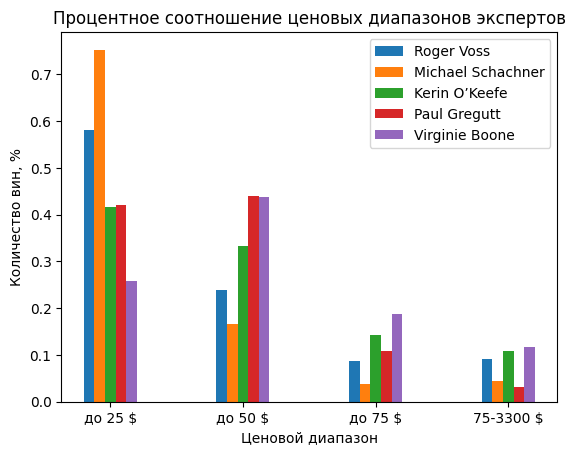

In [87]:
legend = ['до 25 $', 'до 50 $', 'до 75 $', '75-3300 $']  

fig, ax = plt.subplots()
width = 2
x = prices[:4]
k = 2
for i in range(len(taster_names)):
    pr_75[i, :], pr_other[i, :] = counts_in_prices_range(data[data['taster_name'] == taster_names[i]], prices)  
    ax.bar(x - width*(k-i), pr_75[i, :], width)
    
ax.set_title('Процентное соотношение ценовых диапазонов экспертов')
ax.set_xticks(x)
ax.set_xticklabels(legend)
ax.legend(taster_names)
ax.set_xlabel('Ценовой диапазон')
ax.set_ylabel('Количество вин, %')
plt.show()

Из графика видно, что Michael Schachner оценивает преимущественно вина ценовой категории до 50$. А Virgine Boone - более дорогие. У Michael Schachner и Paul Gregutt доля дорогих вин (75-3300 $) мала (менее 5%). Вина нижнего ценового диапазона составляют значительную часть у всех экспертов, это объяснимо тем, что таких вин большинство в выборке.

Также приведем круговые диаграммы для каждого эксперта:

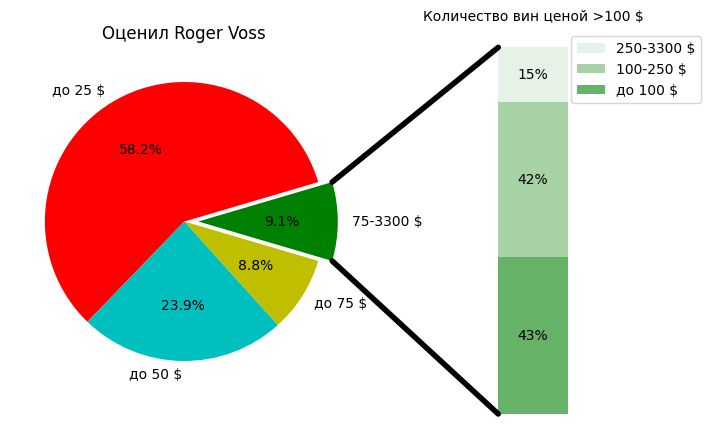

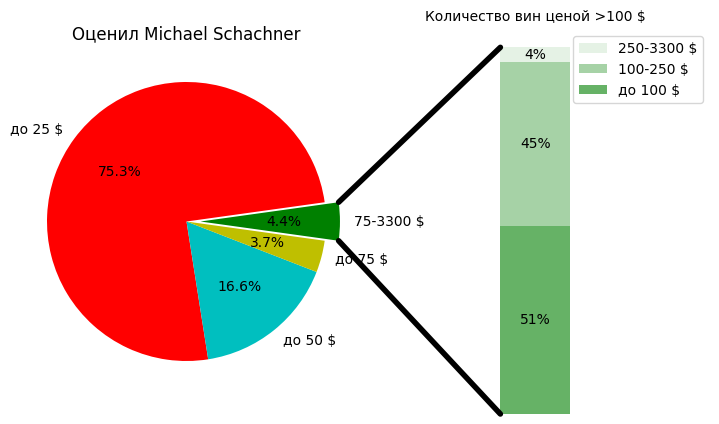

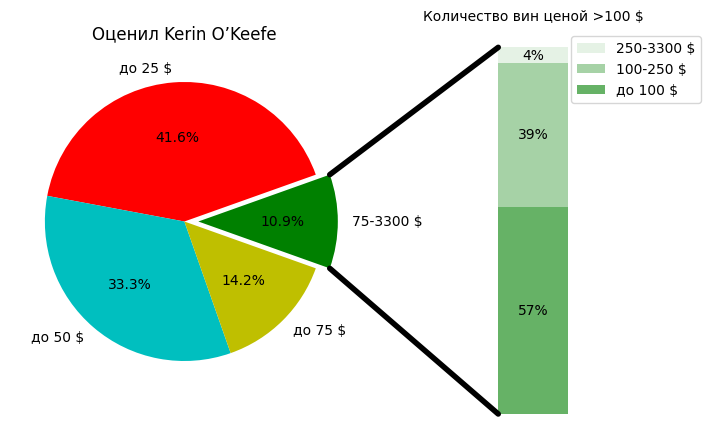

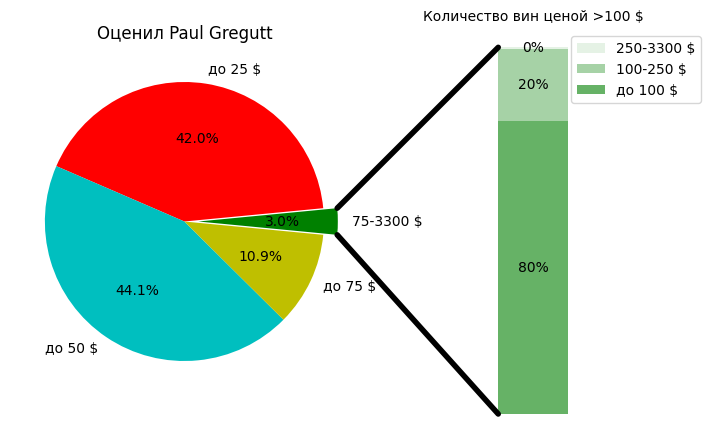

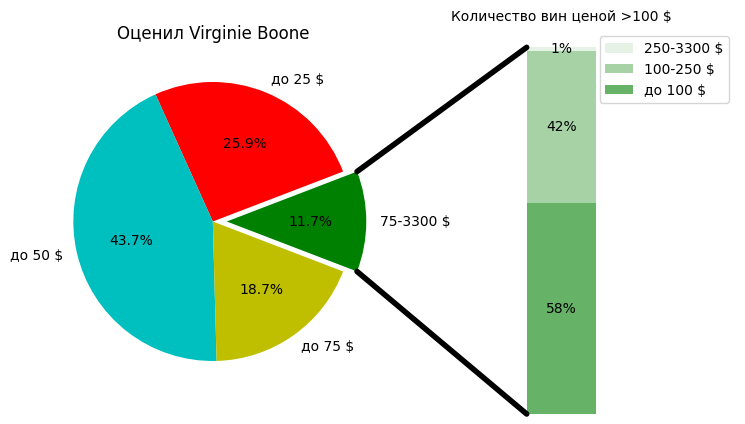

In [88]:
for num_taster in range(len(taster_names)):
    plot_pie_bar(pr_75[num_taster, :], pr_other[num_taster, :], legend, legend_other, explode, color, taster_names[num_taster])